In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
import argparse
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import warnings
from sklearn.metrics import roc_auc_score
from PIL import Image
from IPython.display import SVG
warnings.filterwarnings('ignore')

In [5]:
im = cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/hist_images_2022-08-04-18:07:04')

In [7]:
im.shape


(517, 528, 3)

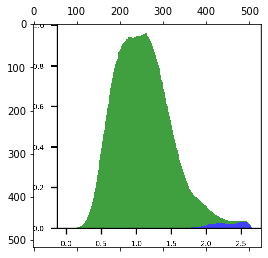

In [8]:
plt.matshow(im)

In [10]:
im2= cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/images_2022-08-04-18:06:33/00000000')

In [11]:
im2.shape

(545, 170, 3)

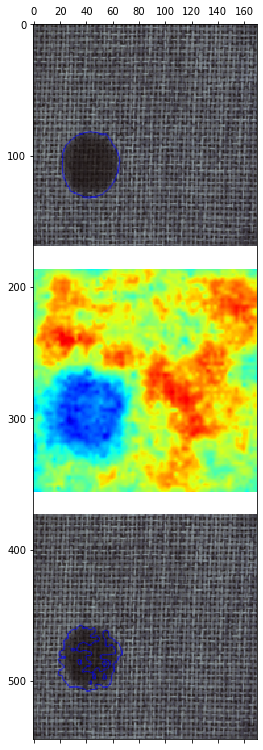

In [12]:
plt.matshow(im2)

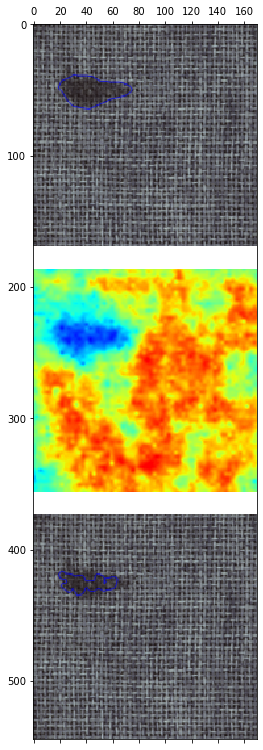

In [14]:
im2= cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/images_2022-08-04-18:06:33/00000009')
plt.matshow(im2)

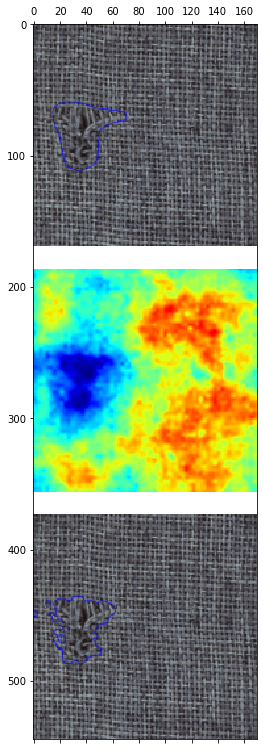

In [15]:
im2= cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/images_2022-08-04-18:06:33/00000019')
plt.matshow(im2)

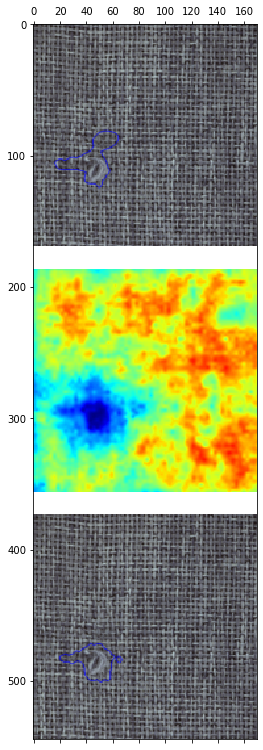

In [16]:
im2= cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/images_2022-08-04-18:06:33/00000110')
plt.matshow(im2)

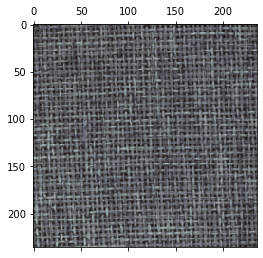

In [29]:
im2= cv2.imread('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/mvtec_wide_resnet50_2_freia-cflow_pl3_cb8_inp512_run0_carpet/gt_images_2022-08-04-18:05:33/00000061')
plt.matshow(im2)

In [27]:
im2

### Import results df

In [3]:
results_df = pd.read_csv('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/results_table.csv')

In [4]:
results_df_train = pd.read_csv('/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz/carpet/results_table_train.csv')

In [5]:
results_df.head()

,Unnamed: 0,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap
0,0,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tes...,1,2.476735,1.159388
1,1,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tes...,1,2.303776,0.980456
2,2,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tes...,1,2.260161,1.043879
3,3,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tes...,1,2.366383,1.031787
4,4,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tes...,1,2.351494,0.958986


In [6]:
results_df_train.head()

,Unnamed: 0,FilesPath,BinaryLabels,MaxScoreAnomalyMap,MeanScoreAnomalyMap
0,0,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tra...,0,2.149378,1.081094
1,1,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tra...,0,2.130183,1.025818
2,2,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tra...,0,2.277131,0.977002
3,3,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tra...,0,2.167768,0.985756
4,4,/gpfsscratch/rech/ohv/ueu39kt/mvtec/carpet/tra...,0,2.154876,0.867760


<AxesSubplot:xlabel='MaxScoreAnomalyMap', ylabel='Density'>

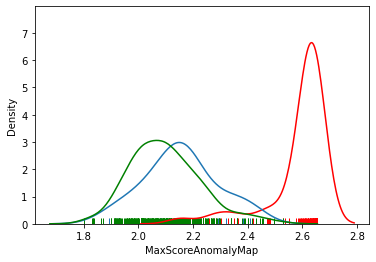

In [7]:
sns.distplot(results_df[results_df['BinaryLabels'] == 1]['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(results_df[results_df['BinaryLabels'] == 0]['MaxScoreAnomalyMap'], hist=False, rug=True)
sns.distplot(results_df_train[results_df_train['BinaryLabels'] == 0]['MaxScoreAnomalyMap'], hist=False, rug=True, color = 'green')


<AxesSubplot:xlabel='MeanScoreAnomalyMap', ylabel='Density'>

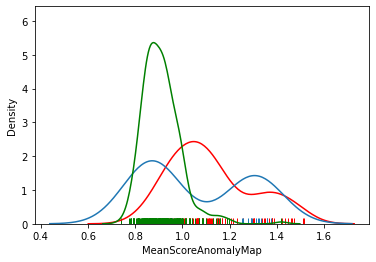

In [8]:
sns.distplot(results_df[results_df['BinaryLabels'] == 1]['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'red')
sns.distplot(results_df[results_df['BinaryLabels'] == 0]['MeanScoreAnomalyMap'], hist=False, rug=True)
sns.distplot(results_df_train[results_df_train['BinaryLabels'] == 0]['MeanScoreAnomalyMap'], hist=False, rug=True, color = 'green')


In [31]:
print('Mean',roc_auc_score(results_df['BinaryLabels'], results_df['MeanScoreAnomalyMap']))
print('Max',roc_auc_score(results_df['BinaryLabels'], results_df['MaxScoreAnomalyMap']))

Mean 0.6308186195826645
Max 0.9783306581059389


In [12]:
def get_img(obj, root = '/gpfsscratch/rech/ohv/ueu39kt/mvtec' , train = False):
    if not train:
        train_test = 'test'
    else:
        train_test = 'train'
    anom_l = []
    img_l = []
    img_name_l = []
    for anom in sorted(os.listdir(os.path.join(root, obj, train_test))):
        for img_name in  sorted(os.listdir(os.path.join(root, obj, train_test, anom))):
            anom_l.append(anom)
            img_l.append(cv2.imread(os.path.join(root, obj, train_test, anom, img_name)))
            img_name_l.append(img_name.split('.')[0])
    img_l = np.array(img_l)
    return img_l, anom_l, img_name_l

In [13]:
 imgs, anom_l, img_name_l= get_img('carpet', root = '/gpfsscratch/rech/ohv/ueu39kt/mvtec' )

In [14]:
imgs.shape

(117, 1024, 1024, 3)

In [16]:
 imgs_train, anom_l_train, img_name_l_train= get_img('carpet', root = '/gpfsscratch/rech/ohv/ueu39kt/mvtec', train = True )

In [17]:
imgs_train.shape

(280, 1024, 1024, 3)

In [66]:
anom_l[:15]

['color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color']

In [67]:
img_name_l[:15]

['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014']

In [25]:
def get_predicted_mask(obj, root = '/gpfsscratch/rech/ohv/ueu39kt/CFLOW/viz', train = False):
    if not train:
        train_test = 'anomaly_map'
    else:
        train_test = 'anomaly_map_train'
    anom_l = []
    img_l = []
    img_name_l = []
    for anom in sorted(os.listdir(os.path.join(root, obj, train_test))):
        for img_name in  sorted(os.listdir(os.path.join(root, obj, train_test, anom))):
            anom_l.append(anom)
            img_l.append(np.load(os.path.join(root, obj, train_test, anom, img_name)))
            img_name_l.append(img_name)
    img_l = np.array(img_l)
    return img_l, anom_l, img_name_l

In [40]:
 anom_map, anom_l, img_name_l = get_predicted_mask('carpet' )

In [26]:
 anom_map_train, anom_l_anom_map_train, img_name_l_train = get_predicted_mask('carpet' , train = True)

In [24]:
anom_map.shape

(117, 512, 512)

In [27]:
anom_map_train.shape

(280, 512, 512)

In [74]:
anom_l[:15]

['color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color',
 'color']

In [75]:
img_name_l[:15]

['000.png.npy',
 '001.png.npy',
 '002.png.npy',
 '003.png.npy',
 '004.png.npy',
 '005.png.npy',
 '006.png.npy',
 '007.png.npy',
 '008.png.npy',
 '009.png.npy',
 '010.png.npy',
 '011.png.npy',
 '012.png.npy',
 '013.png.npy',
 '014.png.npy']

(-0.5, 511.5, 511.5, -0.5)

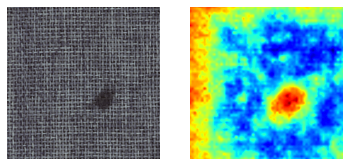

In [76]:
p = 7
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,14))  
axes[0].imshow(imgs[p]) 
axes[0].axis('off')
axes[1].imshow(anom_map[p], cmap = 'jet' ) 
axes[1].axis('off')

In [29]:
def plot_10_tiles(imgs, anom_map):
    sample_10_imgs =   np.arange(anom_map.shape[0])
    np.random.shuffle(sample_10_imgs)
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(3,15))  
    j = 0 
    i = 0
    for p in sample_10_imgs[:10]:
        axes[i,0].imshow(imgs[p]) 
        axes[i,0].axis('off')
        
        axes[i,1].imshow(anom_map[p], cmap = 'jet' ) 
        axes[i,1].axis('off')
        i +=1  
        
    fig.tight_layout()


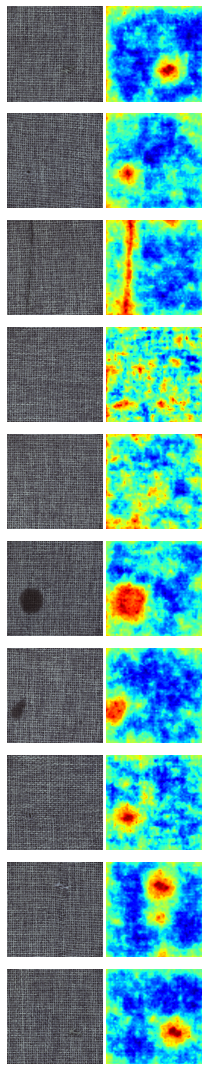

In [47]:
plot_10_tiles(imgs, anom_map)

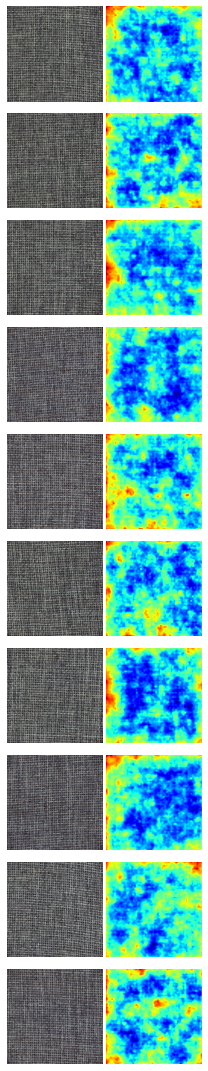

In [30]:
plot_10_tiles(imgs_train, anom_map_train)

In [112]:
q05_l = []
q10_l = []
q20_l = []
q50_l = []
q80_l = []
q90_l = []
q95_l = []
q98_l = []

for anom_map_t in anom_map_train:
    q05_l.append(np.quantile(anom_map_t, 0.5))
    q10_l.append(np.quantile(anom_map_t, 0.10))
    q20_l.append(np.quantile(anom_map_t, 0.20))
    q50_l.append(np.quantile(anom_map_t, 0.50))
    q80_l.append(np.quantile(anom_map_t, 0.80))
    q90_l.append(np.quantile(anom_map_t, 0.90))
    q95_l.append(np.quantile(anom_map_t, 0.95))
    q98_l.append(np.quantile(anom_map_t, 0.999))
Q05_m =  np.mean(np.array(q05_l))
Q10_m =  np.mean(np.array(q10_l))
Q20_m =  np.mean(np.array(q20_l))
Q50_m =  np.mean(np.array(q50_l))
Q80_m =  np.mean(np.array(q80_l))
Q90_m =  np.mean(np.array(q90_l))
Q95_m =  np.mean(np.array(q95_l))
Q98_m =  np.mean(np.array(q98_l))

In [113]:
Q80_m

1.1345667007093663

In [114]:
anom_map_train.shape

(280, 512, 512)

In [115]:
p_px_q05 = []
p_px_q10 = []
p_px_q20 = []
p_px_q50 = []
p_px_q80 = []
p_px_q90 = []
p_px_q95 = []
p_px_q98 = []
for AnomMap_c in  anom_map:
    p_px_q05.append((AnomMap_c < Q05_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q10.append((AnomMap_c < Q10_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q20.append((AnomMap_c < Q20_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q50.append((AnomMap_c > Q50_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q80.append((AnomMap_c > Q80_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q90.append((AnomMap_c > Q90_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q95.append((AnomMap_c > Q95_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q98.append((AnomMap_c > Q98_m).sum() / (AnomMap_c.shape[1]**2))

   

In [116]:
df_prop = pd.DataFrame()
df_prop['Anom'] = anom_l
df_prop['p_px_q05'] = p_px_q05
df_prop['p_px_q10'] = p_px_q10
df_prop['p_px_q20'] = p_px_q20
df_prop['p_px_q50'] = p_px_q50
df_prop['p_px_q80'] = p_px_q80
df_prop['p_px_q90'] = p_px_q90
df_prop['p_px_q95'] = p_px_q95
df_prop['p_px_q98'] = p_px_q98

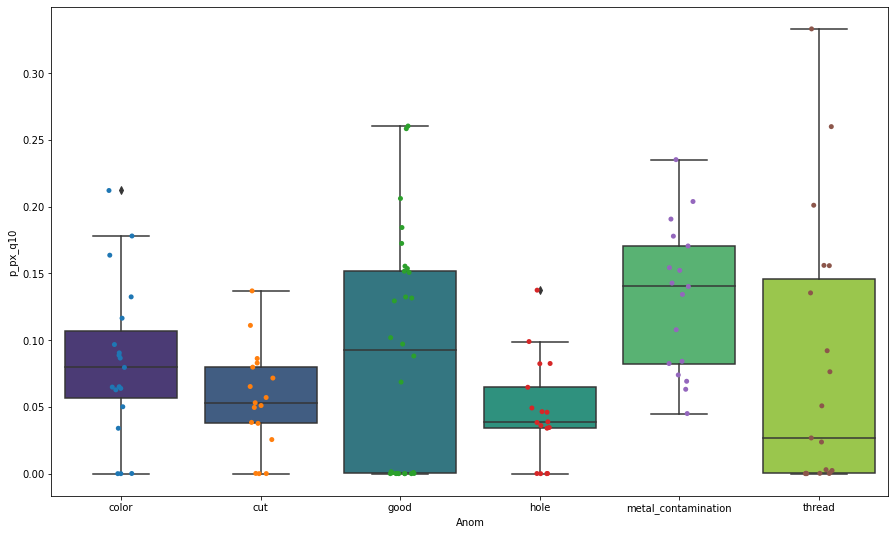

In [117]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q10'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q10'])


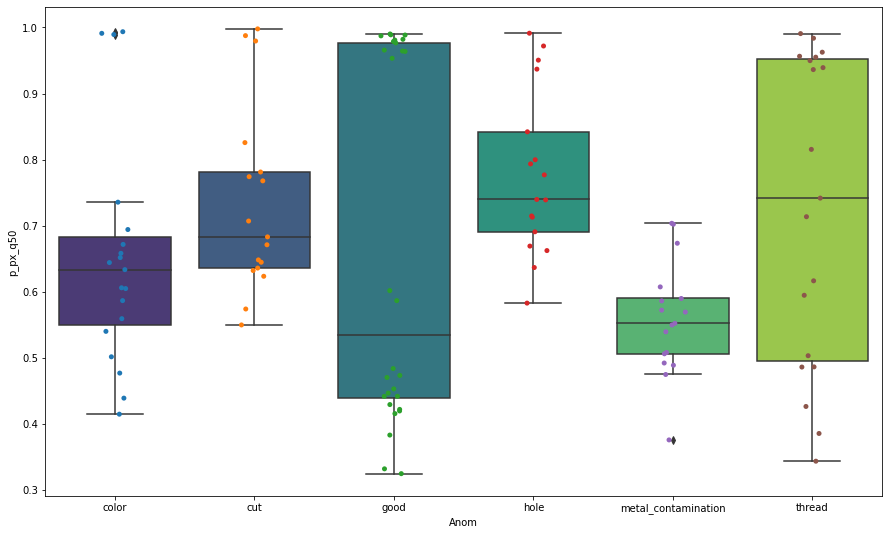

In [118]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q50'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q50'])

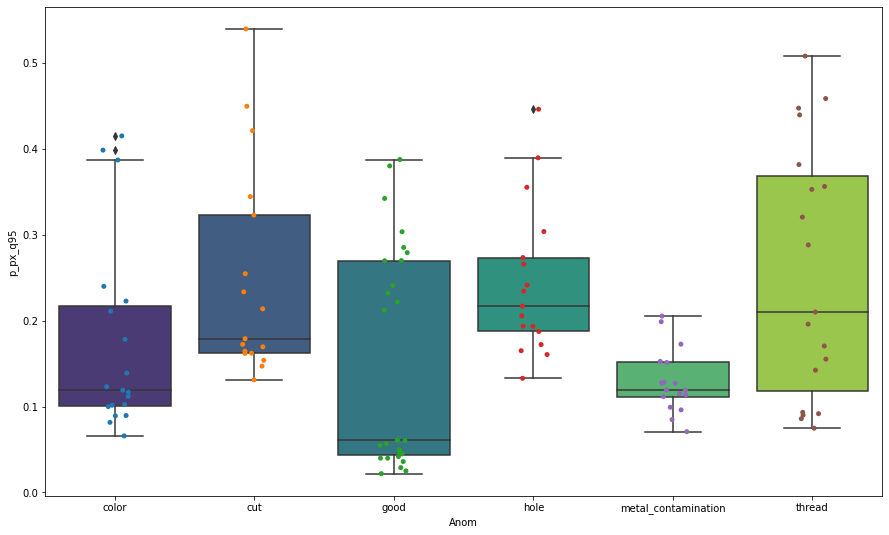

In [119]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q95'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q95'])

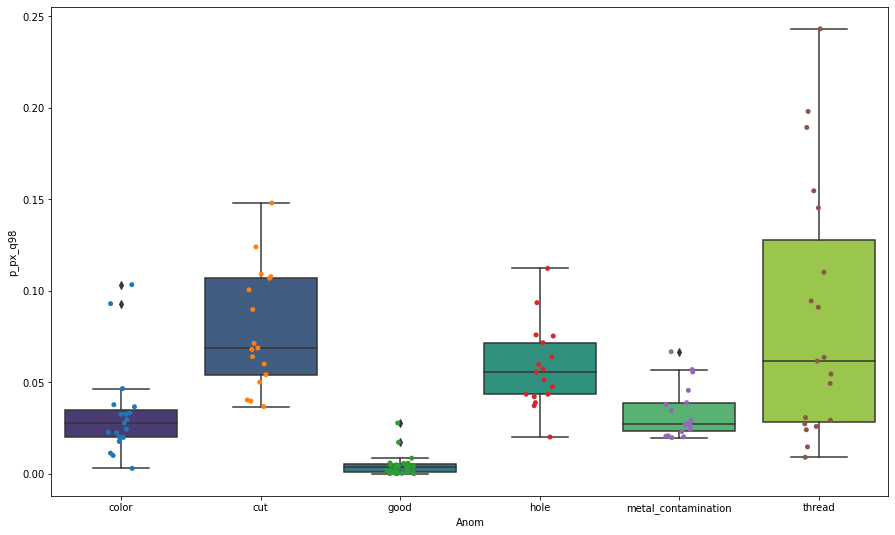

In [120]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q98'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q98'])

In [121]:
df_prop['Labels'] = [0]  * df_prop.shape[0]
df_prop.loc[df_prop['Anom'] == 'good', 'Labels'] = 1

In [122]:
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q05']  ))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q10']))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q20']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q50']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q80']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q90']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q95'] ))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q98'] ))

0.5638041733547352
0.5034109149277689
0.5204654895666132
0.5638041733547351
0.5987158908507223
0.6312199036918138
0.6757624398073836
0.982744783306581


In [127]:
anom_map_train_mean = np.mean(anom_map_train, axis = 0)

In [131]:
anom_map_norm  = anom_map - anom_map_train_mean

In [132]:
p_px_q05 = []
p_px_q10 = []
p_px_q20 = []
p_px_q50 = []
p_px_q80 = []
p_px_q90 = []
p_px_q95 = []
p_px_q98 = []
for AnomMap_c in  anom_map_norm:
    p_px_q05.append((AnomMap_c < Q05_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q10.append((AnomMap_c < Q10_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q20.append((AnomMap_c < Q20_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q50.append((AnomMap_c > Q50_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q80.append((AnomMap_c > Q80_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q90.append((AnomMap_c > Q90_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q95.append((AnomMap_c > Q95_m).sum() / (AnomMap_c.shape[1]**2))
    p_px_q98.append((AnomMap_c > Q98_m).sum() / (AnomMap_c.shape[1]**2))

df_prop = pd.DataFrame()
df_prop['Anom'] = anom_l
df_prop['p_px_q05'] = p_px_q05
df_prop['p_px_q10'] = p_px_q10
df_prop['p_px_q20'] = p_px_q20
df_prop['p_px_q50'] = p_px_q50
df_prop['p_px_q80'] = p_px_q80
df_prop['p_px_q90'] = p_px_q90
df_prop['p_px_q95'] = p_px_q95
df_prop['p_px_q98'] = p_px_q98  

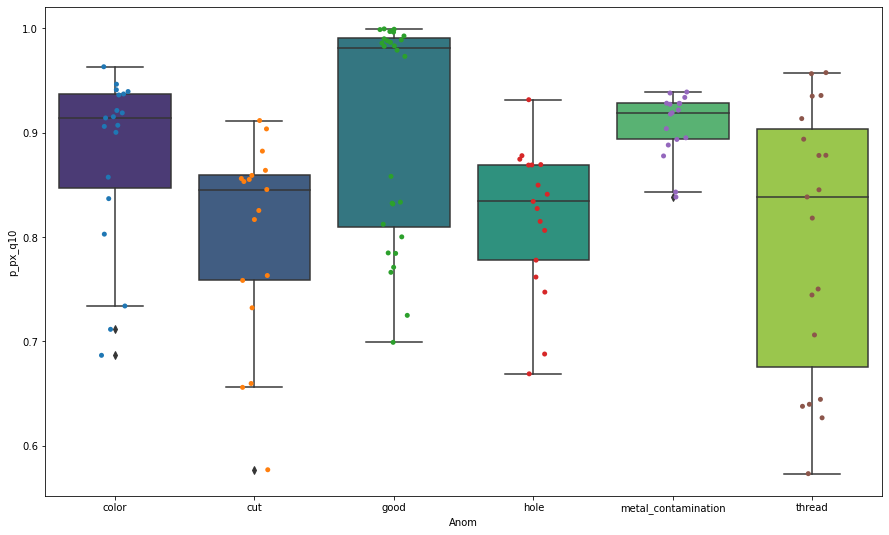

In [133]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q10'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q10'])


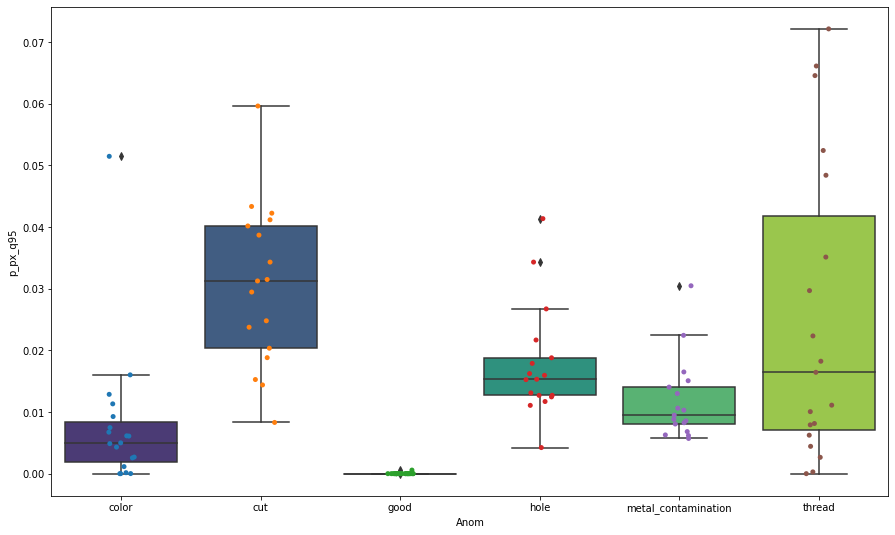

In [135]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q95'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q95'])


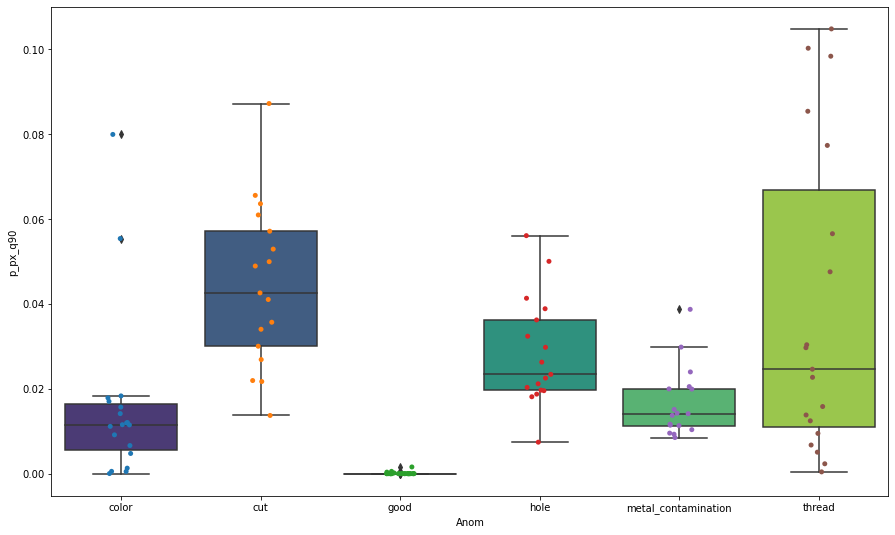

In [136]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(x=df_prop['Anom'], y=df_prop['p_px_q90'], palette= 'viridis')
ax = sns.stripplot(x = df_prop['Anom'] , y = df_prop['p_px_q90'])


In [138]:
df_prop['Labels'] = [0]  * df_prop.shape[0]
df_prop.loc[df_prop['Anom'] == 'good', 'Labels'] = 1
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q05']  ))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q10']))
print(roc_auc_score(df_prop['Labels'], df_prop['p_px_q20']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q50']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q80']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q90']))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q95'] ))
print(1-roc_auc_score(df_prop['Labels'], df_prop['p_px_q98'] ))

0.969502407704655
0.6857945425361156
0.768860353130016
0.9695024077046549
0.9979935794542536
0.9959871589085072
0.9807383627608347
0.5224719101123596


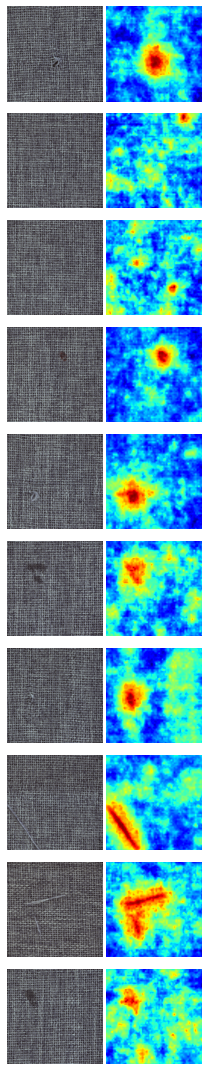

In [139]:
plot_10_tiles(imgs, anom_map_norm)